# Part1: MAP

Write a program in python to implement the MAP (or regularization) for polynomial curve fitting problem. Follow the instructions below:

1. Generate 50 2D-data points using the following function: y = sin(x<sup>2</sup>+1)

In [1]:
import random
import math
import numpy as np

''' 
def syntenic_data():
    x = sorted([random.random() for _ in range(50)])
    y = [math.sin(xi ** 2 + 1) for xi in x ]
    return x,y
'''

def syntenic_data():
    x = np.linspace(0, 1, 50)
    y = np.sin(x ** 2 + 1)
    return x, y
x,y = syntenic_data()
x,y

(array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
 array([0.84147098, 0.84169594, 0.84236995, 0.84349036, 0.84505279,
        0.84705107, 0.84947726, 0.85232157, 0.85557242, 0.85921634,
        0.86323797, 0.86762003, 0.87234327, 0.87738641, 0.88272615,
        0.88833707, 0.89419162, 0.90026007, 0.90651044, 0.9129085 ,
        0.91941768, 0.92599909, 0.93261141, 0.

2. Add Gaussian random noise to the data

In [2]:
'''# If don't use numpy:
def add_noise(y, mean, std):
    noise_data = [yi + random.gauss(mean, std) for yi in y]
    return noise_data

'''
def add_noise(y, mean, std, N):
    noise_data = y + np.random.normal(mean,std,N)
    return noise_data

mean_data, sigma_data = 0, 0.04
noise_y = add_noise(y, mean_data, sigma_data, 50)
noise_y

array([0.8422413 , 0.83919033, 0.76779141, 0.91547666, 0.78895597,
       0.84317936, 0.83623802, 0.87248492, 0.90745158, 0.88365862,
       0.86947819, 0.88993894, 0.88707285, 0.88964724, 0.89880948,
       0.90488207, 0.91370818, 0.89454338, 0.92244123, 0.932375  ,
       0.8847536 , 0.90450359, 0.86062707, 0.90170048, 0.9587944 ,
       1.03512344, 0.97001582, 0.94438654, 0.95341758, 0.95353874,
       1.02082159, 0.92714676, 0.99637275, 1.05922456, 1.01776566,
       0.93247528, 1.03818867, 1.05866784, 0.96140004, 0.9550345 ,
       1.03245968, 0.97354462, 0.95274573, 1.00277885, 0.91517845,
       0.97014015, 0.87698236, 0.89867969, 0.95865924, 0.98496486])

3. Show the original curve line and the noisy data.

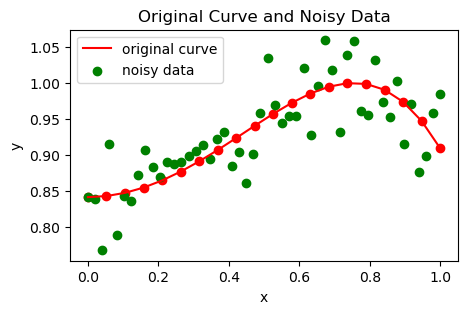

In [3]:
import matplotlib.pyplot as plt

#生成从小到大的间隔相等的点来绘制圆滑的曲线
curve_x = np.linspace(0, 1, 20)
curve_y = np.sin(curve_x ** 2 + 1)

plt.figure(figsize=(5,3))
plt.scatter(curve_x, curve_y, color='red')
plt.plot(curve_x, curve_y, label='original curve', color='red')
plt.scatter(x, noise_y, color='green', label='noisy data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Curve and Noisy Data')
plt.show()



4. Fit the generated noisy data using the MAP as discussed in class.

In [4]:
class MAP:
    def __init__(self, alpha, sigma_data):
        #self.alpha = np.sqrt(1/sigma_prior)
        self.alpha = alpha  # set alpha as a hyperparameter
        self.beta = np.sqrt(1/sigma_data)
        self.w = None

    def fit(self, matrix, t):
        I = np.identity(matrix.shape[1]) 
        self.w = np.linalg.inv((matrix.T @ matrix + (self.alpha / self.beta) * I )) @ matrix.T @ t # fomula

    
    def predit(self, matrix):
        return matrix @ self.w


def X_NM(x, M):
    N = len(x) # number of X
    matrix =  np.ones((N,M))
    for n in range(N):
        for m in range(M):
            matrix[n][m] = x[n] ** m
    return matrix

M =  10
alpha = 0.4

model = MAP(alpha, sigma_data)
matrix = X_NM(x,M)

model.fit(matrix, noise_y)

    

5. Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.

In [5]:

y_predict = model.predit(matrix)
error = 0
for i in range(len(y_predict)):
    error += abs(y_predict[i]- y[i])
error

0.3611076046169934

6. Display the estimated values of w

In [6]:
model.w

array([ 0.82255986,  0.22655023,  0.07759695, -0.00149693, -0.04713853,
       -0.06579764, -0.06249165, -0.04288932, -0.01218458,  0.02547316])

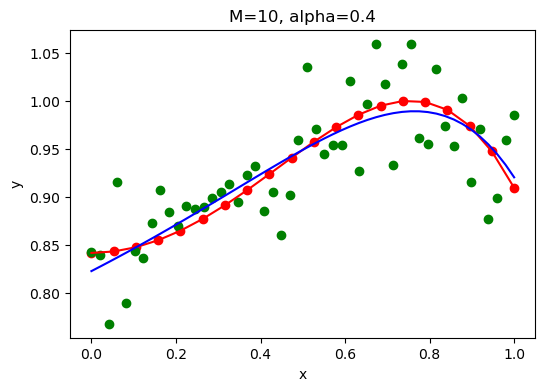

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(curve_x, curve_y, color='red')
plt.plot(curve_x, curve_y,  color='red')
plt.scatter(x, noise_y, color='green')
plt.plot(x, y_predict, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'M={10}, alpha={alpha}')
plt.show()

7. Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha.

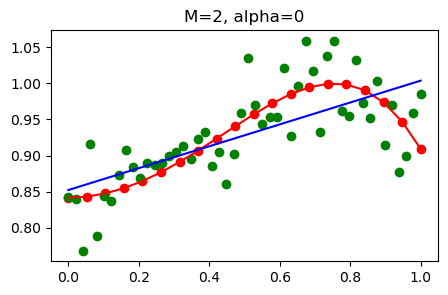

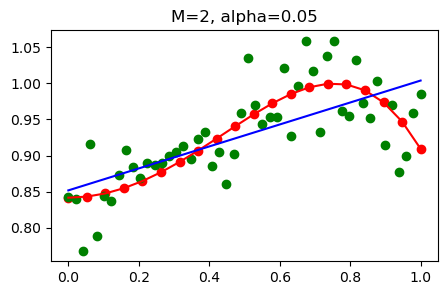

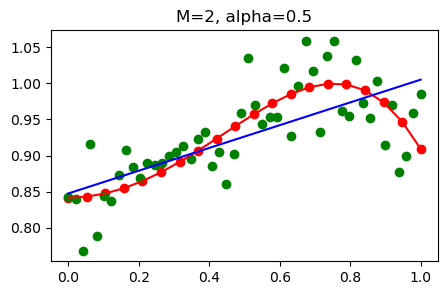

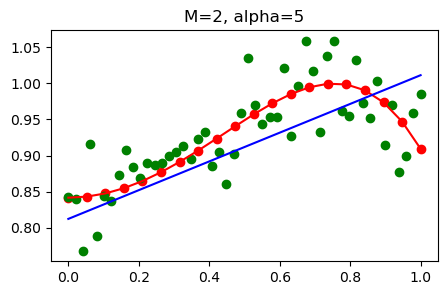

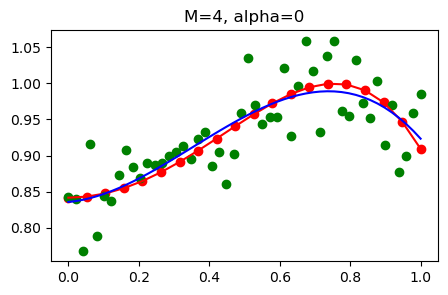

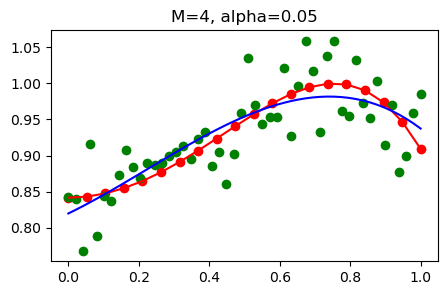

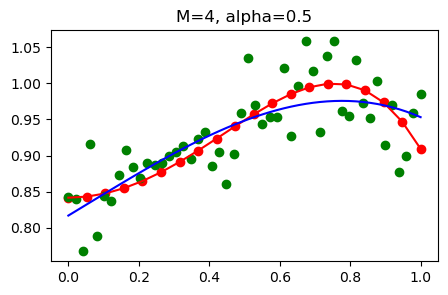

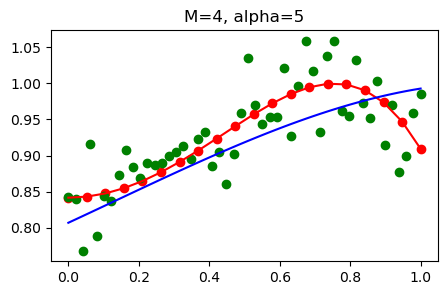

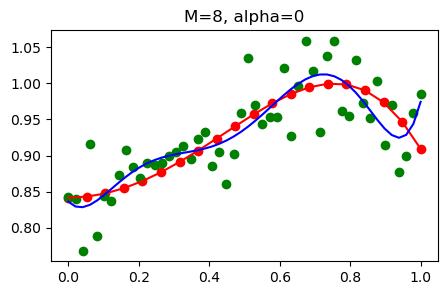

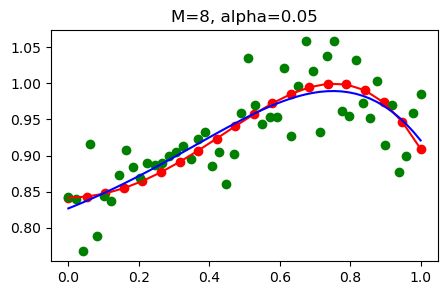

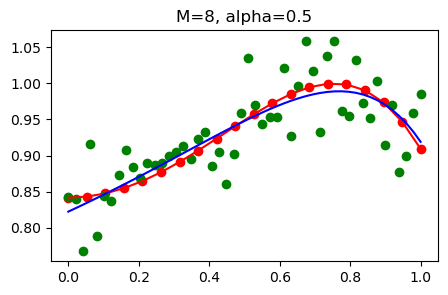

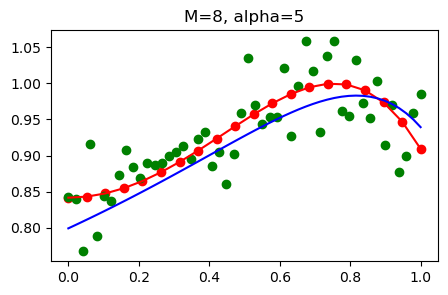

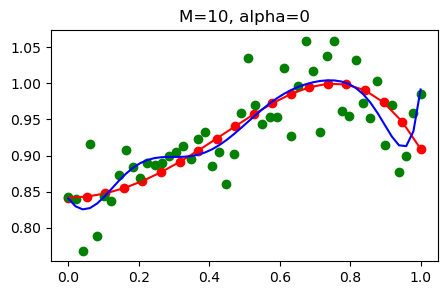

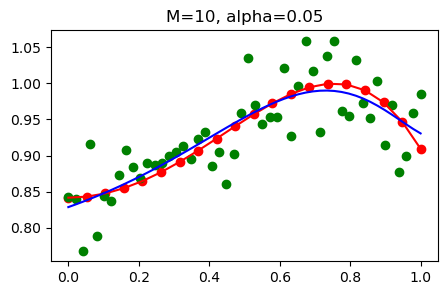

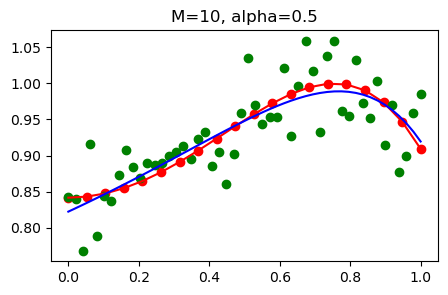

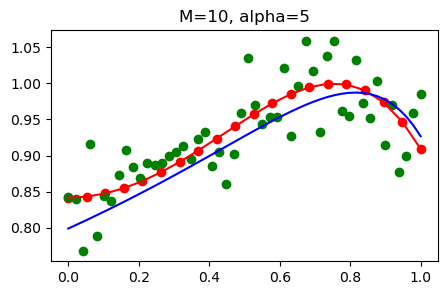

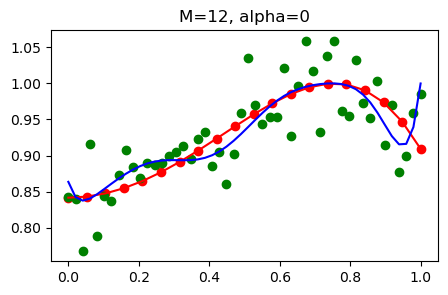

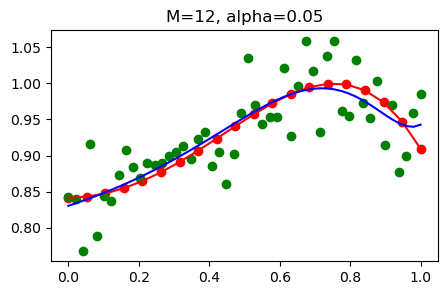

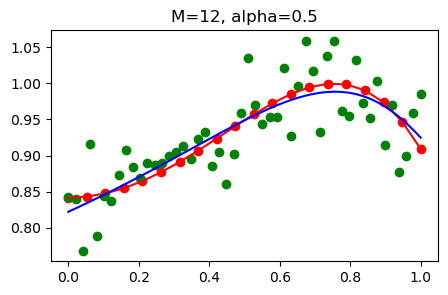

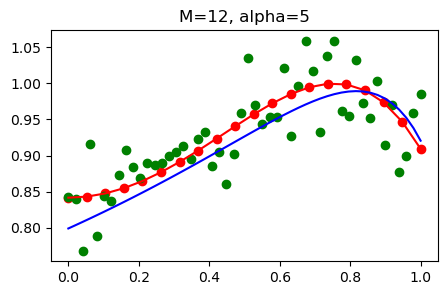

In [8]:
M_params = [2, 4, 8, 10, 12]
Alphas = [0, 0.05, 0.5, 5]
for i in range(5):
    for j in range(4):
        M = M_params[i]
        alpha = Alphas[j]
        matrix =  X_NM(x, M)
        model = MAP(alpha, sigma_data)
        model.fit(matrix, noise_y)
        y_predict = model.predit(matrix)
        plt.figure(figsize=(5,3))
        plt.scatter(curve_x, curve_y, color='red')
        plt.plot(curve_x, curve_y, color='red')
        plt.scatter(x, noise_y, color='green')
        plt.plot(x, y_predict, color='blue')
        plt.title(f'M={M}, alpha={alpha}')
        plt.show()

8. From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.

- For larger values of M (8, 10, 12):
  - When alpha is set to 0, there is a tendency for some degree of overfitting during data fitting.
  - However, increasing alpha to 0.05, 0.5, or 5 effectively mitigates the overfitting phenomenon. Notably, when M is equal to 8, increasing alpha to 5 does not yield as good a fitting result as when alpha is set to 0.05 or 0.5.
- For M value of 2:
  - Setting alpha to 0 results in underfitting during data fitting.
  - However, increasing alpha does not improve the accuracy of data fitting.
- For M value of 4:
  - Increasing alpha actually exacerbates the issue, resulting in more severe underfitting.
- Conclusion:
  - In MAP regression, for larger M values where overfitting is an issue, moderately increasing alpha (within a reasonable range) can effectively alleviate overfitting and improve the precision of data fitting.
  - Alpha is not an effective solution for addressing underfitting problems.